In [187]:
# Import modules

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymatgen.analysis.phase_diagram import PDPlotter, PhaseDiagram, PDEntry, Composition, Element
sys.path.append("/Users/lucy/PycharmProjects/ThermoPot") # ThermoPot install path as not on PYPI yet
from thermopot import materials, calculations, reactions, potentials

data_path = "/Users/lucy/PycharmProjects/ThermoPot/BaZrS3/"  # Path to Ba-Zr-S data
%matplotlib inline

In [157]:
# Use Thermopot to calculate Gibbs free energies at finite temperature

BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/hse06/aims.out")
Ba2Zr1S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba2ZrS4_I4_mmm/hse06/aims.out")
Ba3Zr2S7_calc= calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba3Zr2S7_I4_mmm/hse06/aims.out")
Ba4Zr3S10_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba4Zr3S10_I4_mmm/hse06/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/hse06/aims.out")
Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/hse06/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/hse06/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/hse06/aims.out")
BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/hse06/aims.out")

Ba_material = materials.Solid("Ba",{"Ba":1},data_path+"phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr_material = materials.Solid("Zr",{"Zr":1},data_path+"phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S_material = materials.Solid("S",{"S":1},data_path+"phonopy_output/S_P2_c.dat",calculation=S_calc)
BaZrS3_material = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},data_path+"phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba2Zr1S4_material = materials.Solid("Ba2Zr1S4",{"Ba": 2,"Zr": 1,"S":4},data_path+"phonopy_output/Ba2ZrS4_I4_mmm.dat", calculation=Ba2Zr1S4_calc)
Ba3Zr2S7_material = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},data_path+"phonopy_output/Ba3Zr2S7_I4_mmm.dat",calculation=Ba3Zr2S7_calc)
Ba4Zr3S10_material = materials.Solid("Ba4Zr3S10",{"Ba": 4,"Zr": 3,"S":10},data_path+"phonopy_output/Ba4Zr3S10_I4_mmm.dat", calculation=Ba4Zr3S10_calc)
ZrS2_material = materials.Solid("ZrS2",{"Zr": 1,"S": 2},data_path+"/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
BaS_material = materials.Solid("BaS",{"Ba": 1,"S": 1},data_path+"/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)




<module 'matplotlib.pyplot' from '/Users/lucy/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

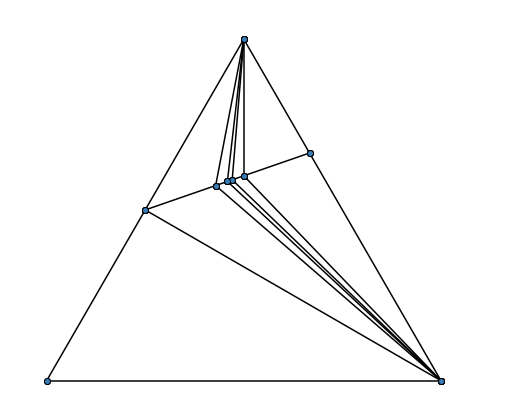

In [239]:
# Use Gibbs free energies and pymatgen to create phase diagram object

T = 1200
P = 1E5

BaZrS3 = PDEntry(Composition("BaZrS3"),BaZrS3_material.mu(T,P,xc="hse06"))
Ba = PDEntry(Composition("Ba"),Ba_material.mu(T,P,xc="hse06"))
Zr = PDEntry(Composition("Zr"),Zr_material.mu(T,P,xc="hse06"))
S = PDEntry(Composition("S"),S_material.mu(T,P,xc="hse06"))
Ba4Zr3S10 = PDEntry(Composition("Ba4Zr3S10"),Ba4Zr3S10_material.mu(T,P,xc="hse06") )
ZrS2 = PDEntry(Composition("ZrS2"),ZrS2_material.mu(T,P,xc="hse06") )
Ba3Zr2S7 = PDEntry(Composition("Ba3Zr2S7"),Ba3Zr2S7_material.mu(T,P,xc="hse06") )
Ba2Zr1S4 = PDEntry(Composition("Ba2Zr1S4"),Ba2Zr1S4_material.mu(T,P,xc="hse06") )
BaS = PDEntry(Composition("BaS"),BaS_material.mu(T,P,xc="hse06"))

pd = PhaseDiagram([BaZrS3,Ba,Zr,S,Ba4Zr3S10,ZrS2,Ba2Zr1S4,Ba3Zr2S7,BaS])
plotter = PDPlotter(pd, show_unstable=0.2, backend="matplotlib",markerfacecolor=(0.2157, 0.4941, 0.7216))
plotter.get_plot(label_stable=False)

<module 'matplotlib.pyplot' from '/Users/lucy/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

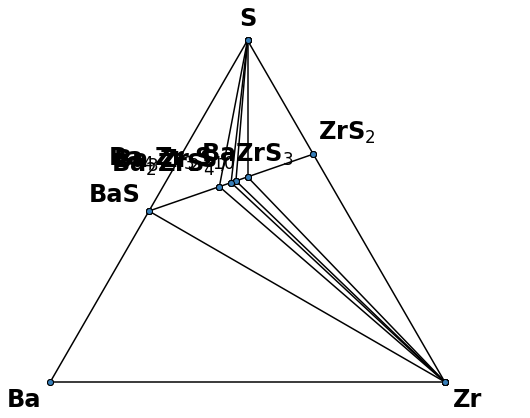

In [240]:
plotter.get_plot()

In [263]:
pd.get_decomposition(Composition("Ba0.226Zr0.203S0.63"))


{PDEntry : Ba1 Zr1 S3 with energy = -356587.0921: 0.6137865911237022,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.38526912181303175,
 PDEntry : Zr1 with energy = -98784.1273: 0.0009442870632673239}

In [280]:
pd.get_decomposition(Composition("Ba0.207Zr0.225S0.552"))   

{PDEntry : Ba1 Zr1 S3 with energy = -356587.0921: 0.35060975609756184,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.5960365853658516,
 PDEntry : Zr1 with energy = -98784.1273: 0.05335365853658525}

In [294]:
pd.get_decomposition(Composition("Ba0.225Zr0.24S0.544"))   

{PDEntry : Ba3 Zr2 S7 with energy = -949210.8304: 0.4400396432110938,
 PDEntry : Ba4 Zr3 S10 with energy = -1305797.9898: 0.4801783944499576,
 PDEntry : Zr1 with energy = -98784.1273: 0.07978196233894935}